In [2]:
import pandas as pd
df_raw = pd.read_csv('./data/arima_data.csv', names = ['day', 'price'])
df_raw.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [4]:
df = df_raw.copy()
df['day'] = pd.to_datetime(df['day'], format = '%Y-%m-%d')
df['year'] = df['day'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     60 non-null     datetime64[ns]
 1   price   60 non-null     int64         
 2   year    60 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.5 KB


In [5]:
df['year'].value_counts()

2013    12
2014    12
2015    12
2016    12
2017    12
Name: year, dtype: int64

In [7]:
df.set_index('day', inplace = True)
df.drop(['year'], axis = 1, inplace = True)

In [8]:
train_len = int(len(df) * 0.8)
train_df = df[:train_len]
test_df = df.drop(train_df.index)

In [9]:
# 정상성 검정
from statsmodels.tsa.stattools import adfuller

adf = adfuller(train_df, autolag = 'AIC')
adf

(-0.7593260321092956,
 0.830778837281536,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 574.3596114052543)

<AxesSubplot:xlabel='day'>

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


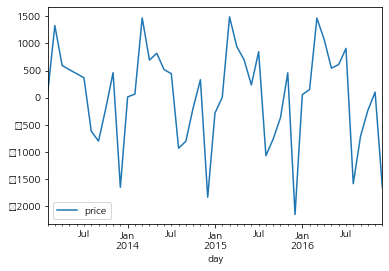

In [10]:
diff_data = train_df.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [11]:
# 정상성 검정
from statsmodels.tsa.stattools import adfuller

adf = adfuller(diff_data, autolag = 'AIC')
adf

(-12.094547576926388,
 2.0851606399614422e-22,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 522.2910197373669)

<AxesSubplot:xlabel='day'>

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


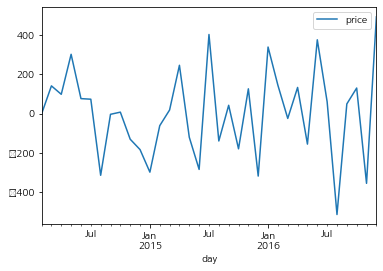

In [12]:
diff_data_s = diff_data.diff(12)
diff_data_s = diff_data_s.dropna()
diff_data_s.plot()

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


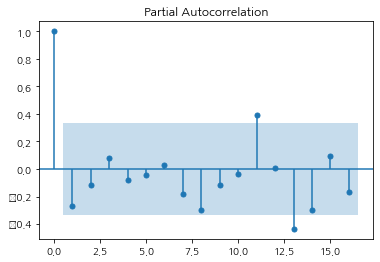

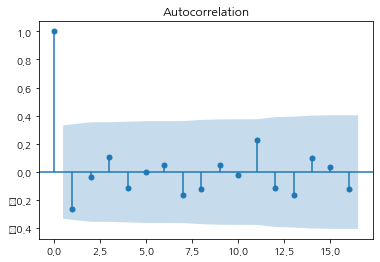

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_pacf(diff_data_s)  # AR = unknown

plot_acf(diff_data_s) # MA = unknown

plt.show()

In [21]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(
                        train_df.values,
                        order = param, seasonal_order = param_seasonal,
                       #trend = 'n',
                       #enforce_stationarity = False,
                       enforce_invertibility = False
                        )
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:983.0138755711488
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1509.2405089209494
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:569.0497809335761


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:534.8024515116762
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:816.0501041374268


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1574.2625708077435
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:526.2574195168256
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:533.1236021834638
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:953.9877987070987


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1787.9216231936448
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:539.2305287606383
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:518.1885417425674
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:773.7134714084987
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1669.5902236445177
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:512.4578890426128


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:511.11689960109743
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:773.7499924922855
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2172.815718484594
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:481.8458153574521
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:483.66927563892193
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:683.6751474603413


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1639.8967854016835
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:483.63685658920735


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:485.28833756118803
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:774.046521666226


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1863.230310351412
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:480.68741445392965
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:482.4659892841306
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:685.0007905774509


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2020.3868937182745
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:482.4025234817389
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:483.80934117773353
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:795.4206252296847
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:2195.9590110094564


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:510.5697175909742
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:506.418254022801
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:698.6420618821835


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1615.7809453508587
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:503.42100581378804


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:500.0609389776265
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:795.4050434022417


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:2313.888717084414
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:508.71581640078847
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:510.70976614322797
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:699.9423412996181
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:505.2396903390371


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:501.7171864085717
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:773.4665211762206
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:2257.347085740744
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:481.0306635956456
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:482.7396506092319
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:685.0067172244962


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:2225.685340530325
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:482.6519032287966
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:483.9779056100472
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:775.1175761305255
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1939.5856919073585
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:482.6818898512484
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:484.46583031245416


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:683.7996208385459


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1758.8688788076515
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:484.40033423973625
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:485.26528317113565


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
# order = (0,1,1), seasonal_order = (0,1,0,12)


#SARIMA : 계절성 반영
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_df.values,
                order = (0,1,1), seasonal_order = (0,1,0,12),
               #trend = 'n',
               #enforce_stationarity = False,
               enforce_invertibility = False)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 19 Nov 2022   AIC                            480.687
Time:                                     18:00:10   BIC                            483.798
Sample:                                          0   HQIC                           481.761
                                              - 48                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.804e+04   1.64e+04      2.923      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


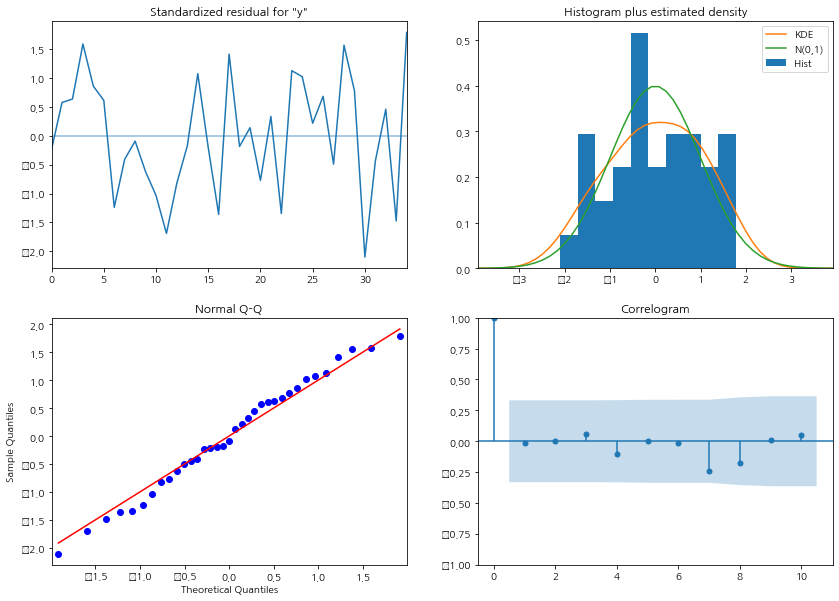

In [23]:
results.plot_diagnostics(figsize = (14,10))
plt.show()

In [24]:
forecast_values = results.get_forecast(steps = len(test_df))

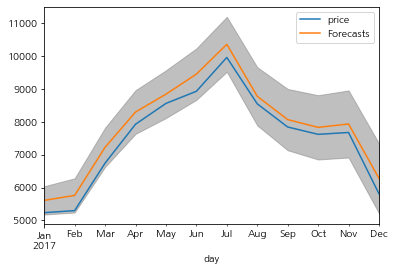

In [25]:
ax = test_df.plot()

pred_ci = pd.DataFrame(forecast_values.conf_int())
pred_ci.index = list(test_df.index)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'gray', alpha = 0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean)
predicted.index = list(test_df.index)
predicted.columns = ['Forecasts']
predicted.plot(ax = ax, label = 'Forcasts')

plt.legend()
plt.show()